# Data Exploration

This notebook describes three tables in database.sqlite
- extreme_weather_events
- socioeconomics
- disaster_risk

## Table 1: extreme_weather_events

### Data overview

In [2]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
db_path = '../data/database.sqlite'
pd.set_option('display.float_format', '{:.2f}'.format)

conn = sqlite3.connect(db_path)

# Create a cursor object
cursor = conn.cursor()
# Read the table into a DataFrame
df_events = pd.read_sql_query("SELECT * FROM extreme_weather_events", conn)

df_events.head(15)


,Year,Seq,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Event Name,Country,Country Code,Location,...,Dis Mag Scale,Local Time,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Total Damages ('000 US$),CPI,Geo Locations
0,1909,2,Natural,Biological,Epidemic,Bacterial disease,Bubonic,Indonesia,IDN,None,...,Vaccinated,None,40.00,20.00,920.00,11250.00,20.00,33000.00,3.48,None
1,1914,22,Natural,Geophysical,Earthquake,Ground movement,None,Indonesia,IDN,"Kepahyang, Bengkulu (Sumatera)",...,Richter,3:07,20.00,20.00,920.00,11250.00,20.00,33000.00,3.88,None
2,1917,3,Natural,Geophysical,Earthquake,Ground movement,None,Indonesia,IDN,Bali,...,Richter,7:08,15000.00,27.50,920.00,11250.00,3763.33,33000.00,4.96,None
3,1919,1,Natural,Geophysical,Volcanic activity,Ash fall,Mt. Kelud,Indonesia,IDN,Small Island between Java and Sumatra,...,None,None,5000.00,35.00,920.00,11250.00,7506.67,33000.00,6.71,None
4,1924,7,Natural,Geophysical,Earthquake,Ground movement,None,Indonesia,IDN,Wonosobo (Central Java),...,Richter,None,727.00,42.50,920.00,11250.00,11250.00,33000.00,6.64,None
5,1927,14,Natural,Geophysical,Earthquake,Ground movement,None,Indonesia,IDN,"Sulawesi, Donggala",...,Richter,11:37,50.00,50.00,920.00,9592.00,50.00,33000.00,6.73,None
6,1928,12,Natural,Geophysical,Earthquake,Tsunami,None,Indonesia,IDN,Flores sea,...,Richter,None,128.00,66.25,920.00,7934.00,806.25,33000.00,6.65,None
7,1930,3,Natural,Geophysical,Volcanic activity,Ash fall,Mt. Merapi,Indonesia,IDN,Java Island,...,None,None,1369.00,82.50,920.00,6276.00,1562.50,33000.00,6.47,None
8,1931,12,Natural,Geophysical,Volcanic activity,Ash fall,Mt. Merapi,Indonesia,IDN,None,...,None,None,1300.00,98.75,920.00,4618.00,2318.75,33000.00,5.89,None
9,1932,9,Natural,Geophysical,Earthquake,Ground movement,None,Indonesia,IDN,"Kakas, Langowan, Poso, Tondano (North Sulawesi)",...,Richter,21:08,6.00,115.00,920.00,2960.00,3075.00,33000.00,5.28,None


In [22]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2738 entries, 0 to 2737
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      2738 non-null   int64  
 1   Seq                       2738 non-null   int64  
 2   Disaster Group            2738 non-null   object 
 3   Disaster Subgroup         2738 non-null   object 
 4   Disaster Type             2738 non-null   object 
 5   Disaster Subtype          2395 non-null   object 
 6   Event Name                1053 non-null   object 
 7   Country                   2738 non-null   object 
 8   Country Code              2738 non-null   object 
 9   Location                  2539 non-null   object 
 10  Origin                    564 non-null    object 
 11  Associated Dis            495 non-null    object 
 12  Appeal                    509 non-null    object 
 13  Declaration               557 non-null    object 
 14  Aid Cont

In [23]:
# Check if there are missing values
# Remember data imputation in 'No Injured', 'No Affected', 'No Homeless', 'Total Affected', 'CPI', "Total Damages ('000 US$)" columns were implemented

df_events.isna().sum().sort_values()

Year                           0
No Injured                     0
No Affected                    0
CPI                            0
No Homeless                    0
Total Affected                 0
Country                        0
Country Code                   0
Disaster Type                  0
Disaster Subgroup              0
Disaster Group                 0
Seq                            0
Total Damages ('000 US$)       0
Location                     199
Disaster Subtype             343
Total Deaths                 540
Dis Mag Scale                913
Geo Locations               1675
Event Name                  1685
Dis Mag Value               2095
Origin                      2174
Declaration                 2181
Appeal                      2229
Associated Dis              2243
Local Time                  2599
Aid Contribution            2627
dtype: int64

In [29]:
# Unique country:
df_events['Country'].unique()

array(['Indonesia', 'Myanmar', 'Philippines', 'Thailand', 'Malaysia',
       "Lao People's DR", 'Cambodia', 'Viet Nam', 'Singapore',
       'Brunei Darussalam', 'Timor-Leste'], dtype=object)

In [30]:
# Unique disaster group:
df_events['Disaster Group'].unique()

array(['Natural', 'Technological', 'Complex Disasters'], dtype=object)

In [31]:
# Unique disaster type:
df_events['Disaster Type'].unique()

array(['Epidemic', 'Earthquake', 'Volcanic activity',
       'Transport accident', 'Flood', 'Landslide', 'Storm', 'Drought',
       'Miscellaneous accident', 'Industrial accident',
       'Insect infestation', 'Wildfire', 'Mass movement (dry)',
       'Complex Disasters', 'Extreme temperature'], dtype=object)

## Table 2: socioeconomics

### Data overview

In [13]:
# Read the table into a DataFrame
df_socioeconomics = pd.read_sql_query("SELECT * FROM socioeconomics", conn)
df_socioeconomics.head(15)


,Country,Country Code,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Sanitation,Injuries,Communicable,NonCommunicable
0,Indonesia,IDN,Lower middle income,2001,66.04,19.20,302060.00,2.12,2.46,6.08,58.92,6996569.30,30881627.35,41520804.67
1,Cambodia,KHM,Lower middle income,2001,59.34,23.60,2150.00,7.01,1.72,1.03,58.92,575530.43,3831903.27,2432916.20
2,Myanmar,MMR,Lower middle income,2001,60.38,37.60,8350.00,2.15,4.60,0.67,58.92,2642483.37,13438452.76,11950793.29
3,Malaysia,MYS,Upper middle income,2001,72.78,2.50,129460.00,2.68,7.48,3.53,65.86,675010.81,1040202.68,3668019.93
4,Philippines,PHL,Lower middle income,2001,68.83,18.70,70480.00,2.85,2.92,3.70,43.52,2887545.85,9955777.05,13181817.63
5,Singapore,SGP,High income,2001,78.25,18.00,42030.00,3.16,3.54,3.76,100.00,84897.01,63745.56,602137.61
6,Thailand,THA,Upper middle income,2001,70.83,17.30,173160.00,3.03,4.82,2.60,20.05,3853836.67,4314043.74,11879825.13
7,Vietnam,VNM,Lower middle income,2001,73.23,19.70,56720.00,4.51,3.73,2.76,29.85,2704748.48,5466480.61,12763734.45
8,Indonesia,IDN,Lower middle income,2002,66.32,19.10,305640.01,1.98,2.65,6.60,39.65,6843320.92,30124966.45,42387112.22
9,Cambodia,KHM,Lower middle income,2002,60.28,21.20,2210.00,7.24,1.71,1.10,49.44,577266.37,3617795.69,2467339.87


In [4]:
df_socioeconomics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         152 non-null    object 
 1   Country Code                    152 non-null    object 
 2   IncomeGroup                     152 non-null    object 
 3   Year                            152 non-null    int64  
 4   Life Expectancy World Bank      152 non-null    float64
 5   Prevelance of Undernourishment  152 non-null    float64
 6   CO2                             152 non-null    float64
 7   Health Expenditure %            152 non-null    float64
 8   Education Expenditure %         152 non-null    float64
 9   Unemployment                    152 non-null    float64
 10  Sanitation                      152 non-null    float64
 11  Injuries                        152 non-null    float64
 12  Communicable                    152 

In [5]:
# Check if there are missing values
df_socioeconomics.isna().sum().sort_values()

Country                           0
Country Code                      0
IncomeGroup                       0
Year                              0
Life Expectancy World Bank        0
Prevelance of Undernourishment    0
CO2                               0
Health Expenditure %              0
Education Expenditure %           0
Unemployment                      0
Sanitation                        0
Injuries                          0
Communicable                      0
NonCommunicable                   0
dtype: int64

In [6]:
df_socioeconomics.describe()

,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Sanitation,Injuries,Communicable,NonCommunicable
count,152.00,152.00,152.00,152.00,152.00,152.00,152.00,152.00,152.00,152.00,152.00
mean,2010.00,71.60,11.23,145982.17,3.87,3.48,2.63,53.51,2419995.93,6566513.75,14436807.75
std,5.50,5.61,6.50,140107.01,1.32,1.21,1.86,22.72,2177947.48,7295092.52,14407359.76
min,2001.00,59.34,2.50,2150.00,1.93,0.85,0.14,20.05,77171.94,63745.56,598024.83
25%,2005.00,68.05,7.07,36855.00,2.98,2.76,0.86,38.27,650574.70,1516182.86,3561847.28
50%,2010.00,71.34,10.20,98660.00,3.67,3.31,2.44,51.34,2571715.85,3801631.05,12258879.27
75%,2015.00,75.06,15.07,227590.00,4.32,4.16,3.72,61.05,3105230.95,9352548.89,16458642.75
max,2019.00,83.60,37.60,619840.03,7.58,7.66,8.06,100.00,15958395.23,30881627.35,56014795.86


## Table 3: disaster_risk

In [6]:
# Read the table into a DataFrame
df_disaster_risk = pd.read_sql_query("SELECT * FROM disaster_risk", conn)
df_disaster_risk.head(15)

,Country,Country Code,Year,World Risk Index,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capabilities
0,Brunei Darussalam,BRN,2000,1.35,0.33,5.55,5.68,2.45,12.26
1,Cambodia,KHM,2000,10.63,2.49,45.34,25.00,65.02,57.33
2,Indonesia,IDN,2000,41.63,39.31,44.09,29.26,56.61,51.73
3,Lao People's DR,LAO,2000,3.56,0.38,33.40,39.91,14.49,64.42
4,Malaysia,MYS,2000,13.05,8.56,19.89,22.63,9.95,34.94
5,Myanmar,MMR,2000,36.94,23.58,57.87,55.54,57.85,60.32
6,Philippines,PHL,2000,44.97,40.62,49.79,38.95,56.21,56.37
7,Singapore,SGP,2000,0.60,0.15,2.39,2.61,0.71,7.34
8,Thailand,THA,2000,22.84,13.79,37.84,43.74,47.48,26.08
9,Timor-Leste,TLS,2000,7.89,2.80,22.22,57.39,3.20,59.75


In [13]:
df_disaster_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        264 non-null    object 
 1   Country Code                   264 non-null    object 
 2   Year                           264 non-null    int64  
 3   World Risk Index               264 non-null    float64
 4   Exposure                       264 non-null    float64
 5   Vulnerability                  264 non-null    float64
 6   Susceptibility                 264 non-null    float64
 7   Lack of Coping Capabilities    264 non-null    float64
 8   Lack of Adaptive Capabilities  264 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 18.7+ KB


In [14]:
# Check if there are missing values
df_disaster_risk.isna().sum().sort_values()

Country                          0
Country Code                     0
Year                             0
World Risk Index                 0
Exposure                         0
Vulnerability                    0
Susceptibility                   0
Lack of Coping Capabilities      0
Lack of Adaptive Capabilities    0
dtype: int64

In [17]:
df_disaster_risk.describe()

,Year,World Risk Index,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capabilities
count,264.000000,264.000000,264.00000,264.000000,264.000000,264.000000,264.000000
mean,2011.500000,18.585227,14.42072,29.102121,26.562197,27.343561,43.244621
std,6.935334,15.513510,14.91782,16.522790,15.955449,23.180254,16.981935
min,2000.000000,0.600000,0.15000,2.390000,1.880000,0.510000,3.470000
25%,2005.750000,3.550000,0.38000,20.695000,15.512500,11.010000,29.247500
50%,2011.500000,13.485000,8.62000,26.355000,23.695000,14.065000,49.070000
75%,2017.250000,33.207500,26.73250,42.982500,39.222500,55.710000,56.637500
max,2023.000000,47.290000,40.62000,62.360000,59.850000,65.620000,67.450000


In [34]:
##
df_sociodisaster =  pd.read_sql_query("SELECT * FROM disaster_risk as d JOIN socioeconomics AS s ON s.'Country Code' = d.'Country Code' AND s.Year = d.Year", conn)
df_sociodisaster

                                World Risk Index  Exposure  Vulnerability  \
World Risk Index                            1.00      0.94           0.83   
Exposure                                    0.94      1.00           0.62   
Vulnerability                               0.83      0.62           1.00   
Susceptibility                              0.79      0.59           0.92   
Lack of Coping Capabilities                 0.68      0.46           0.87   
Lack of Adaptive Capabilities               0.60      0.51           0.69   
Life Expectancy World Bank                 -0.52     -0.34          -0.78   
Prevelance of Undernourishment              0.23      0.18           0.28   
CO2                                         0.29      0.46          -0.05   
Health Expenditure %                       -0.37     -0.38          -0.12   
Education Expenditure %                    -0.10     -0.05          -0.25   
Unemployment                                0.10      0.29          -0.26   

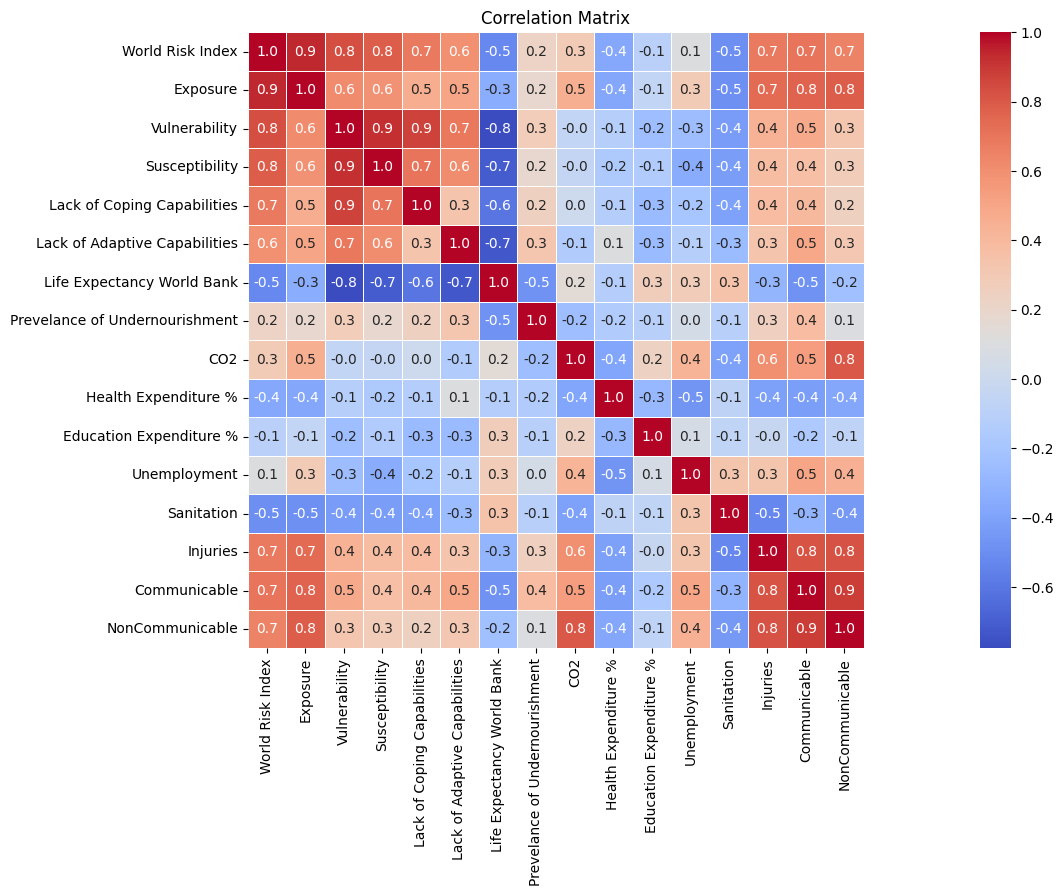

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
columns_to_correlate = [
    "World Risk Index", "Exposure", "Vulnerability", "Susceptibility",
    "Lack of Coping Capabilities", "Lack of Adaptive Capabilities", "Life Expectancy World Bank",
    "Prevelance of Undernourishment", "CO2", "Health Expenditure %", "Education Expenditure %",
    "Unemployment", "Sanitation", "Injuries", "Communicable", "NonCommunicable"
]

# Filter the DataFrame
df_filtered = df_sociodisaster[columns_to_correlate]

# Compute the correlation matrix
correlation_matrix = df_filtered.corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(30, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='coolwarm', square=True, linewidths=.5)

plt.title('Correlation Matrix')
plt.show()

## VISUALIZATION

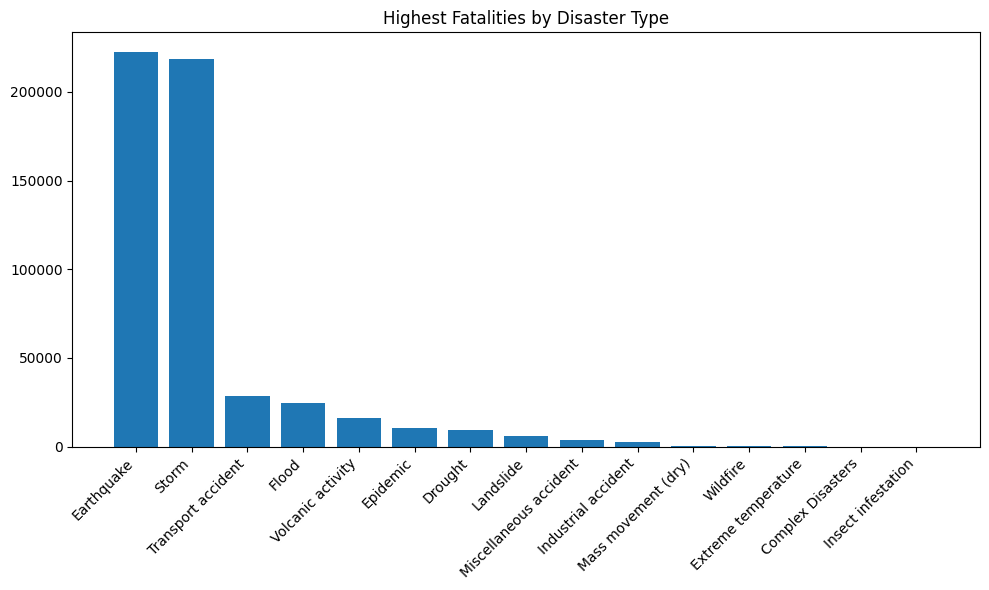

In [9]:
## patterns
# which countries has highest occurences of extreme weather events?
# just use the extreme_weather_data
df_events_grouped = df_events.groupby('Disaster Type')['Total Deaths'].sum().reset_index()
df_events_sorted = df_events_grouped.sort_values(by = "Total Deaths", ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(df_events_sorted['Disaster Type'], df_events_sorted['Total Deaths'])
plt.xticks(rotation=45, ha='right')
plt.title("Highest Fatalities by Disaster Type")
plt.tight_layout()
plt.show()

C:\Users\z004vmhv\AppData\Local\Temp\ipykernel_75208\1904588230.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust for super title


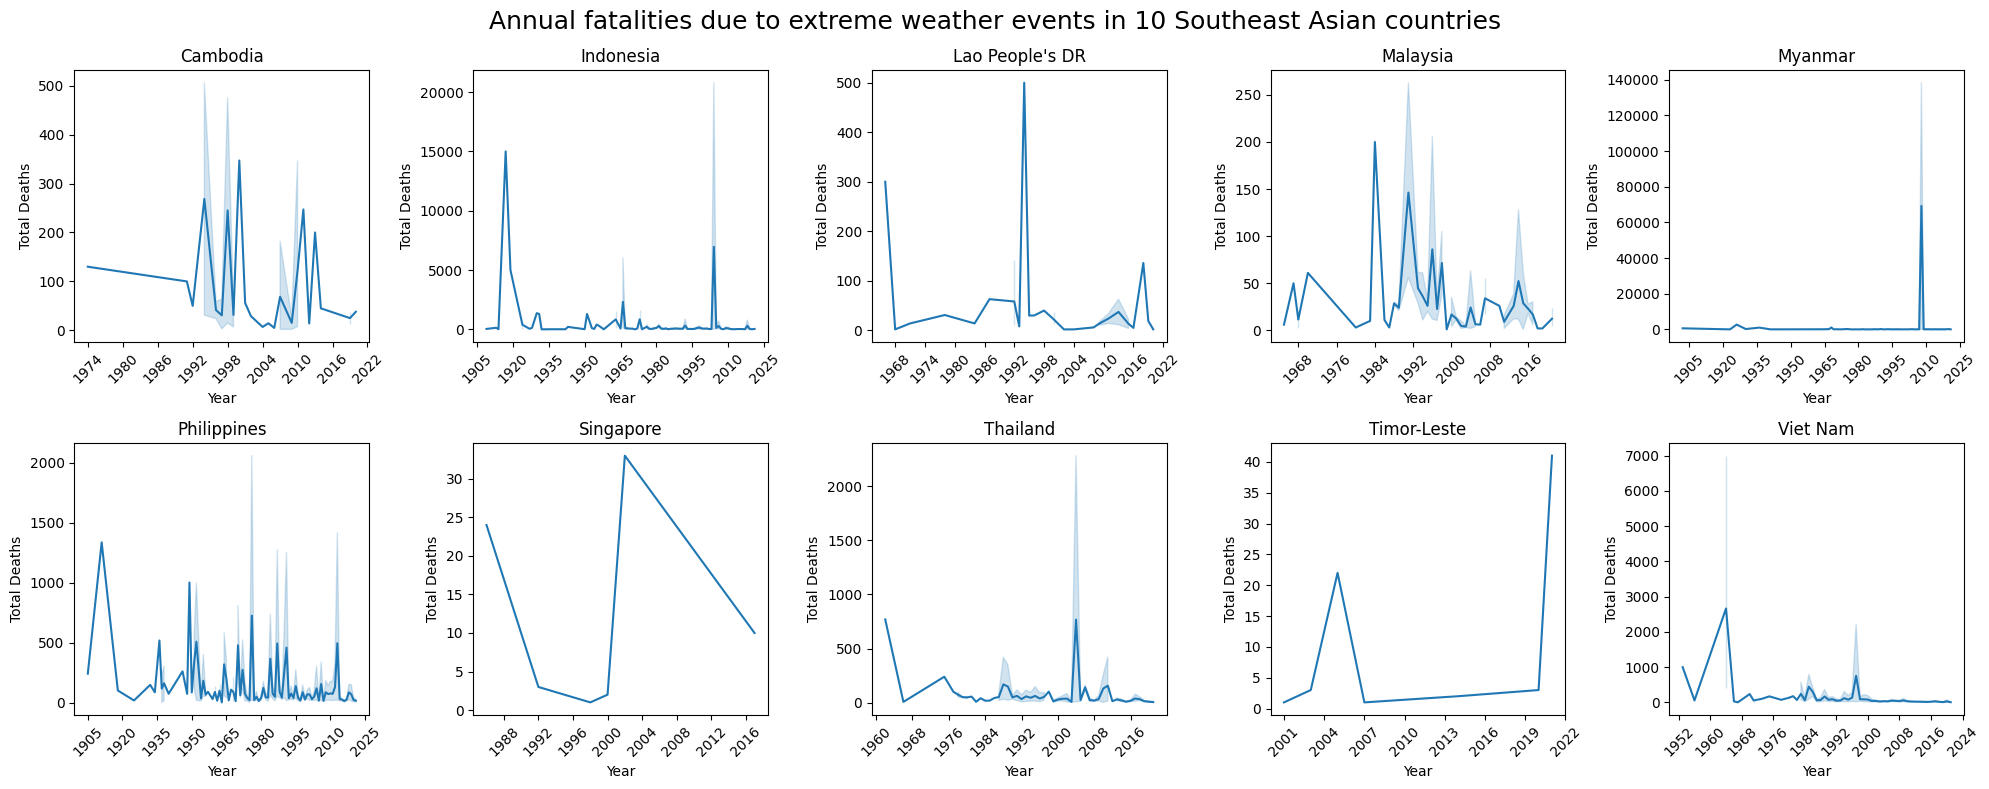

In [4]:
import seaborn as sns
from matplotlib.ticker import MaxNLocator

SEA_country = [ 'Cambodia', 'Indonesia', "Lao People's DR", 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Timor-Leste', 'Viet Nam']


# Set up the subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20,8), constrained_layout=True) 
axes = axes.flatten()

fig.suptitle('Annual fatalities due to extreme weather events in 10 Southeast Asian countries', fontsize=18)

for i, country in enumerate(SEA_country):
    data = df_events[df_events['Country'] == country]

    # Fix data types and missing values
    sns.lineplot(data=data, x='Year', y='Total Deaths', ax=axes[i])
    axes[i].set_title(country)
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Total Deaths')
    axes[i].xaxis.set_major_locator(MaxNLocator(integer=True))
    axes[i].tick_params(axis='x', rotation=45)
# Remove the last subplot (since we have 11 countries and 12 subplots)

plt.tight_layout()  # Adjust for super title
plt.show()

     Year  Seq Disaster Group Disaster Subgroup Disaster Type  \
879  1998   57        Natural    Climatological      Wildfire   

    Disaster Subtype Event Name            Country Country Code Location  ...  \
879      Forest fire       None  Brunei Darussalam          BRN     None  ...   

    Dis Mag Scale Local Time Total Deaths No Injured  No Affected  \
879           Km2       None          NaN      74.00    698373.60   

     No Homeless Total Affected Total Damages ('000 US$)   CPI  Geo Locations  
879    106311.40      578632.00                  2000.00 62.98           None  

[1 rows x 26 columns]


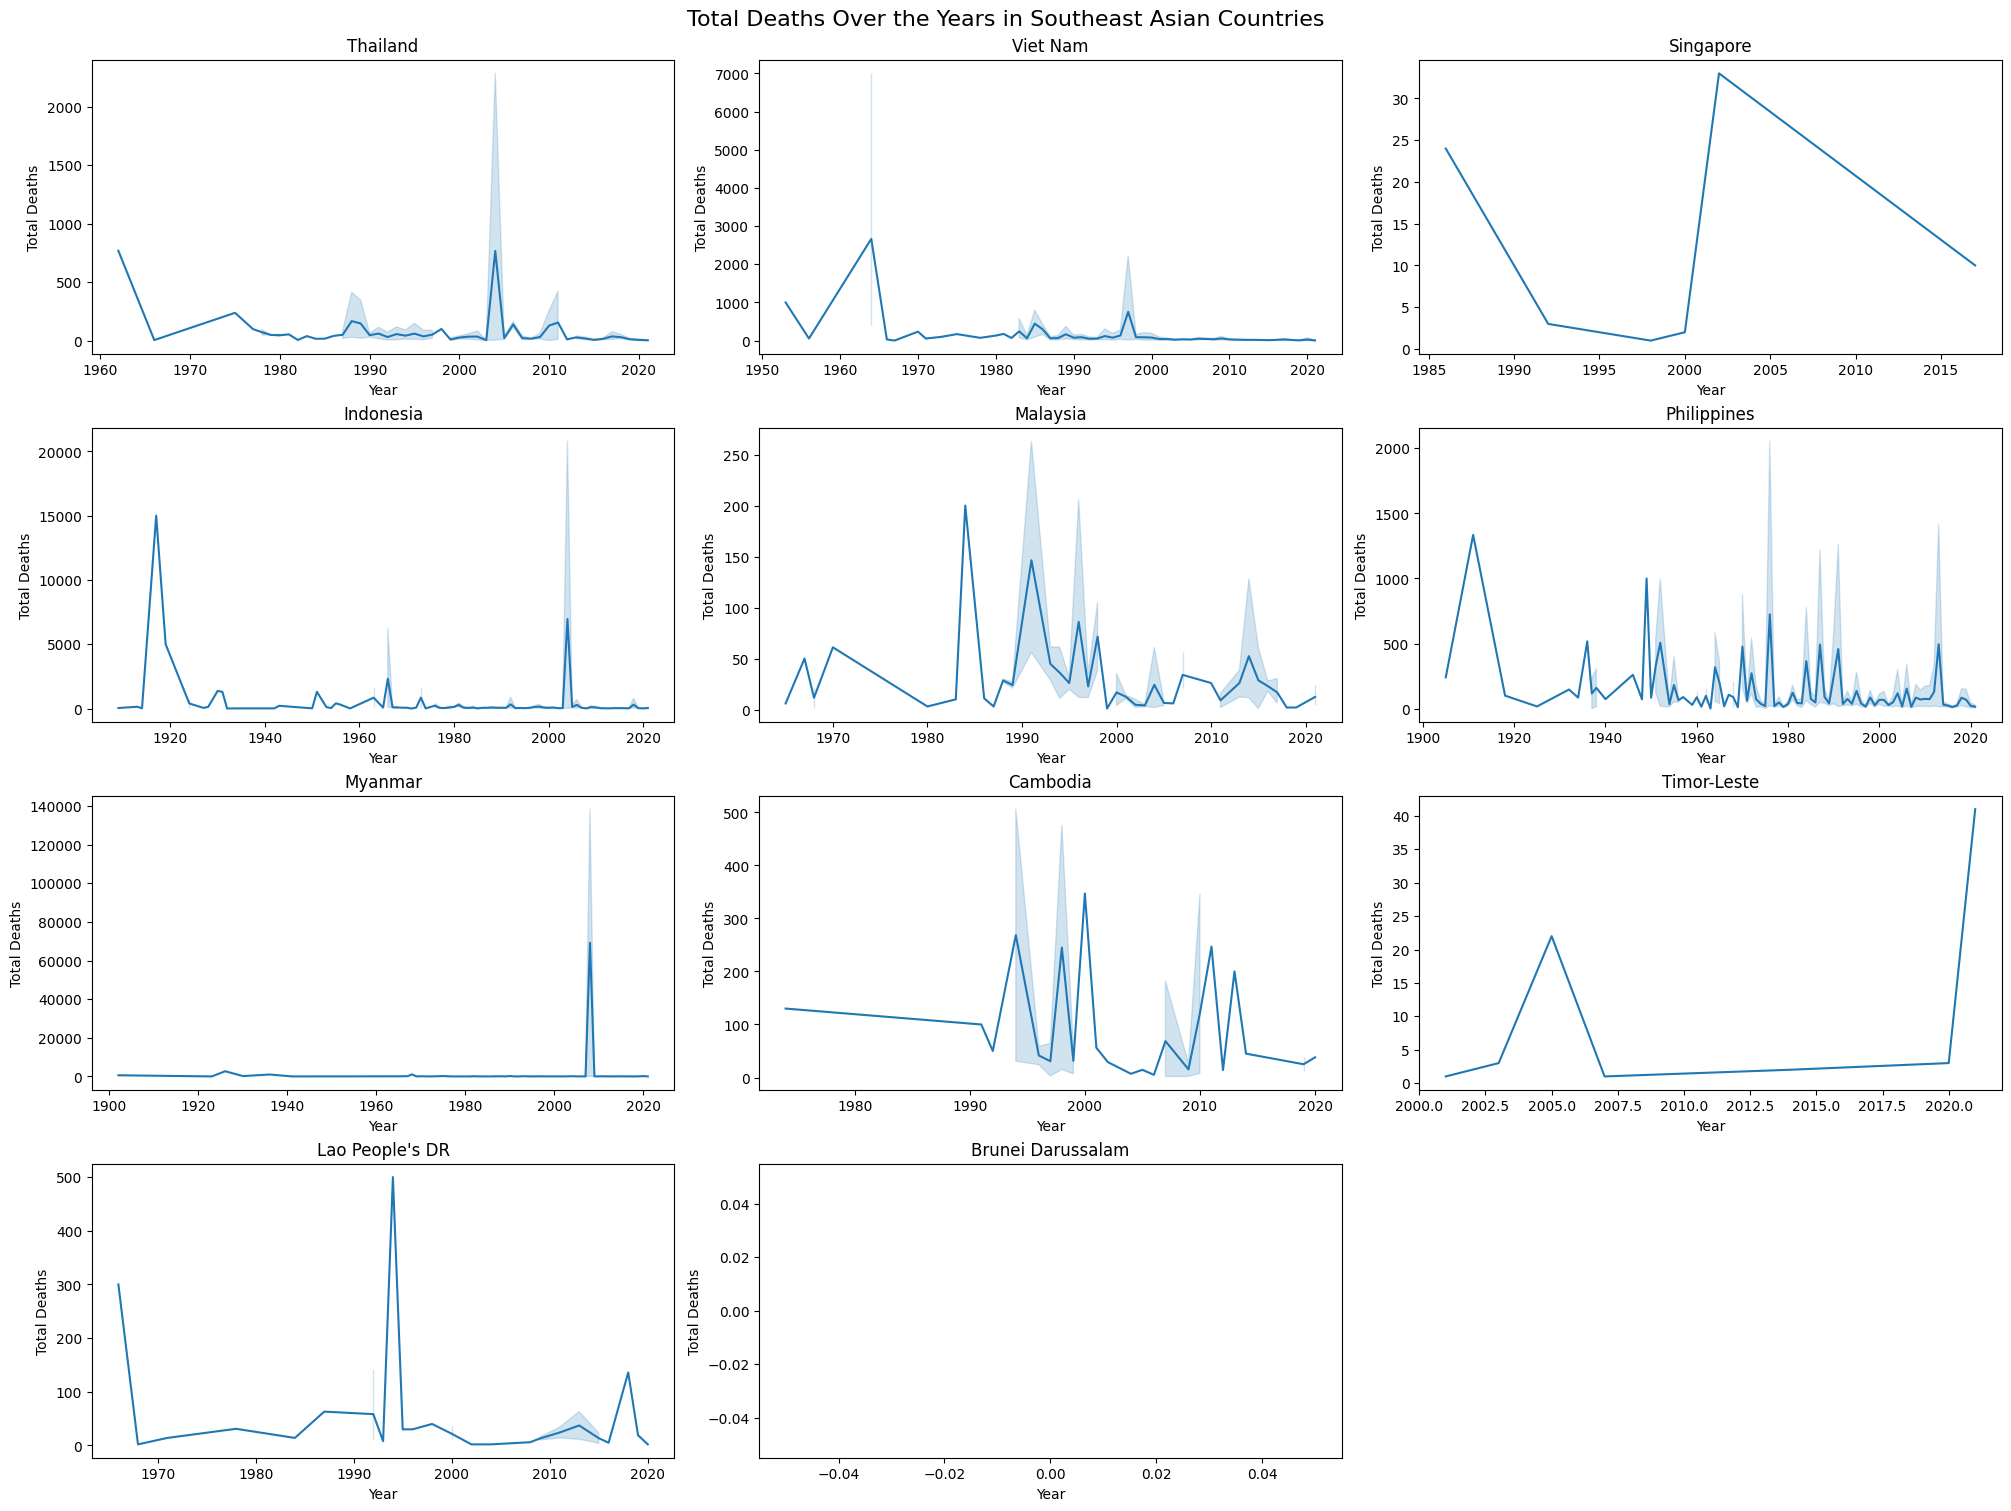

In [41]:
import seaborn as sns

SEA_country = ["Thailand", "Viet Nam", "Singapore", "Indonesia", "Malaysia", "Philippines", "Myanmar", "Cambodia", "Timor-Leste",
                             "Lao People's DR", "Brunei Darussalam"]
# Set up the subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 15), constrained_layout=True)
axes = axes.flatten()
for i, country in enumerate(SEA_country):
    data = df_events[df_events['Country'] == country]
    

    
    sns.lineplot(data=data, x='Year', y='Total Deaths', ax=axes[i])
    axes[i].set_title(country)
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Total Deaths')
print(data)
# Remove the last subplot (since we have 11 countries and 12 subplots)
fig.delaxes(axes[-1])

plt.suptitle('Total Deaths Over the Years in Southeast Asian Countries', fontsize=16)
plt.show()

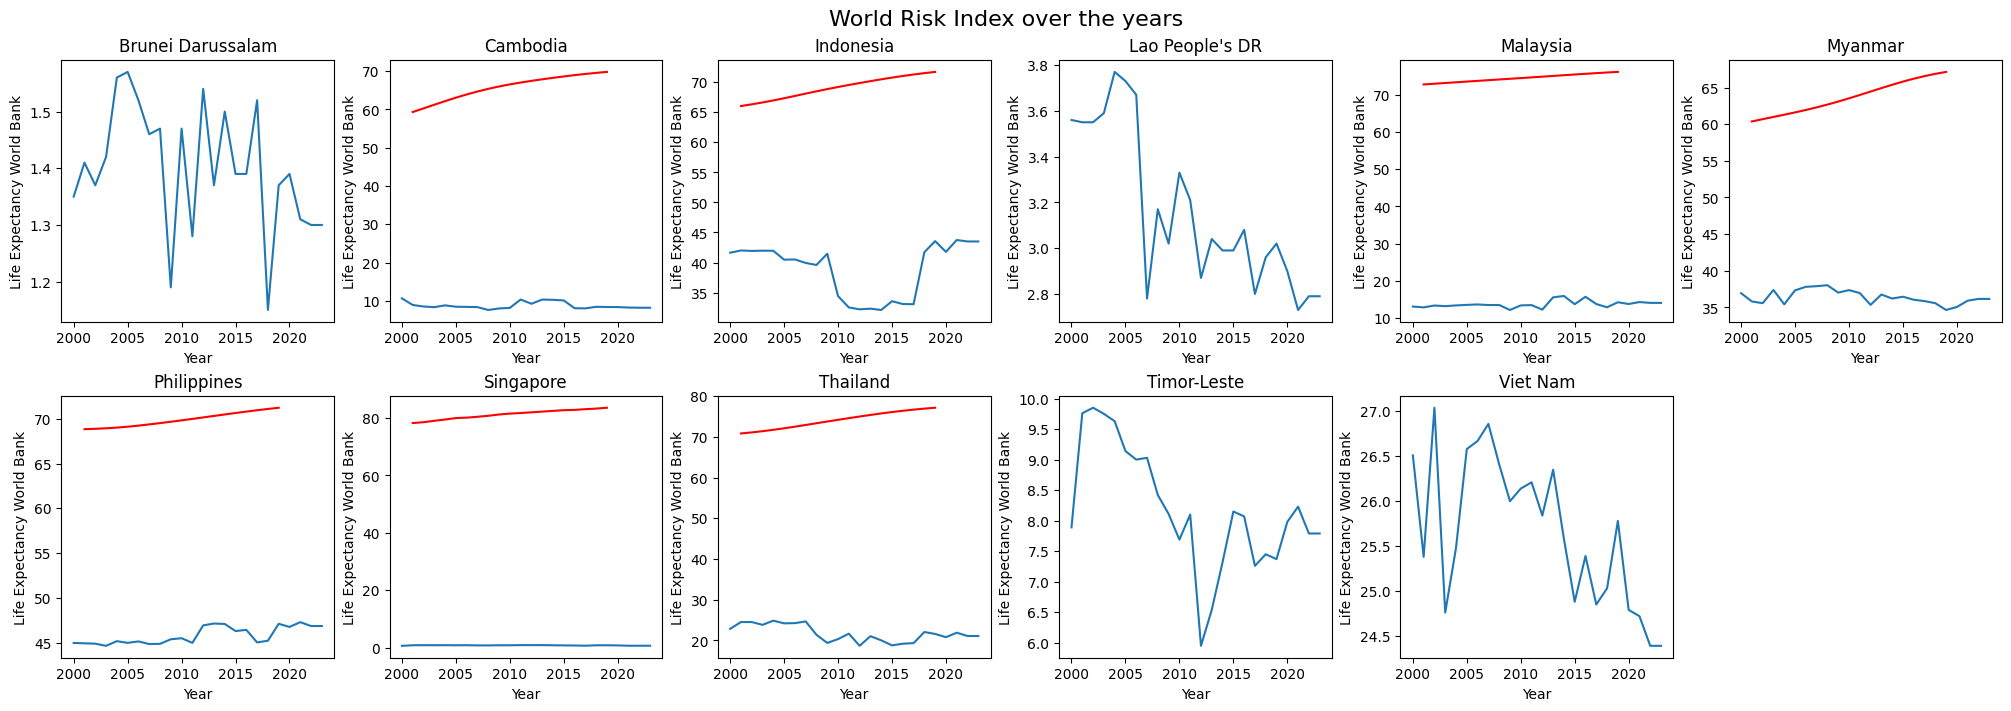

In [14]:
# Set up the subplots
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(20, 7), constrained_layout=True)
axes = axes.flatten()
# Replace 'Lao People's Democracy' with 'Lao People's DR'
SEA_coun = [ 'Brunei Darussalam', 'Cambodia', 'Indonesia', "Lao People's DR", 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Timor-Leste', 'Viet Nam']

# Verify the replacement
for i, country in enumerate(SEA_coun):
    data = df_disaster_risk[df_disaster_risk['Country'] == country]
    
    sns.lineplot(data=data, x='Year', y='World Risk Index', ax=axes[i])
    axes[i].set_title(country)
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('World Risk Index')
    
      # Plot Life Expectancy (assuming 'Life Expectancy' is a column in df_life_expectancy)
    life_data = df_socioeconomics[df_socioeconomics['Country'] == country]
    sns.lineplot(data=life_data, x='Year', y='Life Expectancy World Bank', ax=axes[i], color='red')  # Adjust color and style as needed
    axes[i].set_ylabel('Life Expectancy World Bank')  # Adjust ylabel for life expectancy plot
# Remove the last subplot (since we have 11 countries and 12 subplots)
fig.delaxes(axes[-1])

plt.suptitle('World Risk Index over the years', fontsize=16)
plt.show()

C:\Users\z004vmhv\AppData\Local\Temp\ipykernel_75208\1759105354.py:28: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


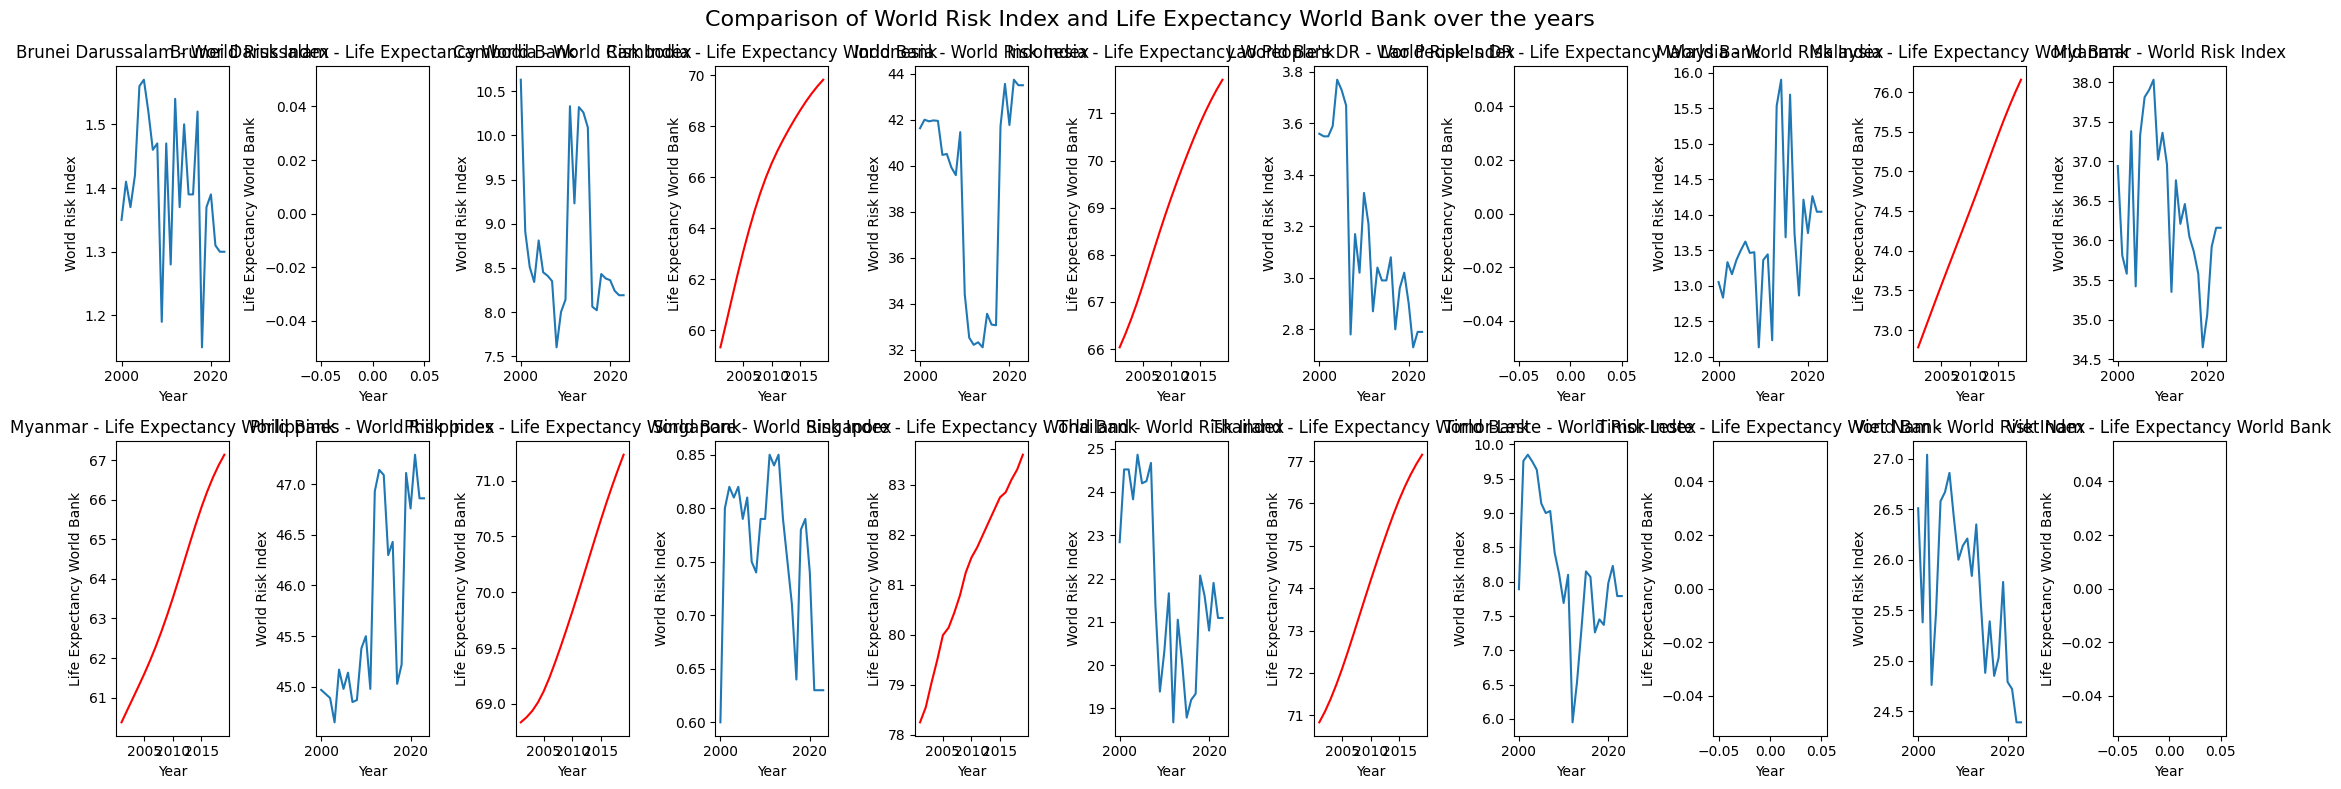

In [21]:
# Set up the subplots
fig, axes = plt.subplots(nrows=2, ncols=11, figsize=(22, 8), constrained_layout=True)
axes = axes.flatten()

# Replace 'Lao People's Democracy' with 'Lao People's DR'
SEA_coun = ['Brunei Darussalam', 'Cambodia', 'Indonesia', "Lao People's DR", 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Timor-Leste', 'Viet Nam']

# Verify the replacement and plot for each country
for i, country in enumerate(SEA_coun):
    # Plot World Risk Index
    data_risk = df_disaster_risk[df_disaster_risk['Country'] == country]
    sns.lineplot(data=data_risk, x='Year', y='World Risk Index', ax=axes[2*i])
    axes[2*i].set_title(country + ' - World Risk Index')
    axes[2*i].set_xlabel('Year')
    axes[2*i].set_ylabel('World Risk Index')

    # Plot Life Expectancy
    data_life = df_socioeconomics[df_socioeconomics['Country'] == country]
    sns.lineplot(data=data_life, x='Year', y='Life Expectancy World Bank', ax=axes[2*i+1], color='red')
    axes[2*i+1].set_title(country + ' - Life Expectancy World Bank')
    axes[2*i+1].set_xlabel('Year')
    axes[2*i+1].set_ylabel('Life Expectancy World Bank')

# Set common title for the entire plot
fig.suptitle('Comparison of World Risk Index and Life Expectancy World Bank over the years', fontsize=16)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

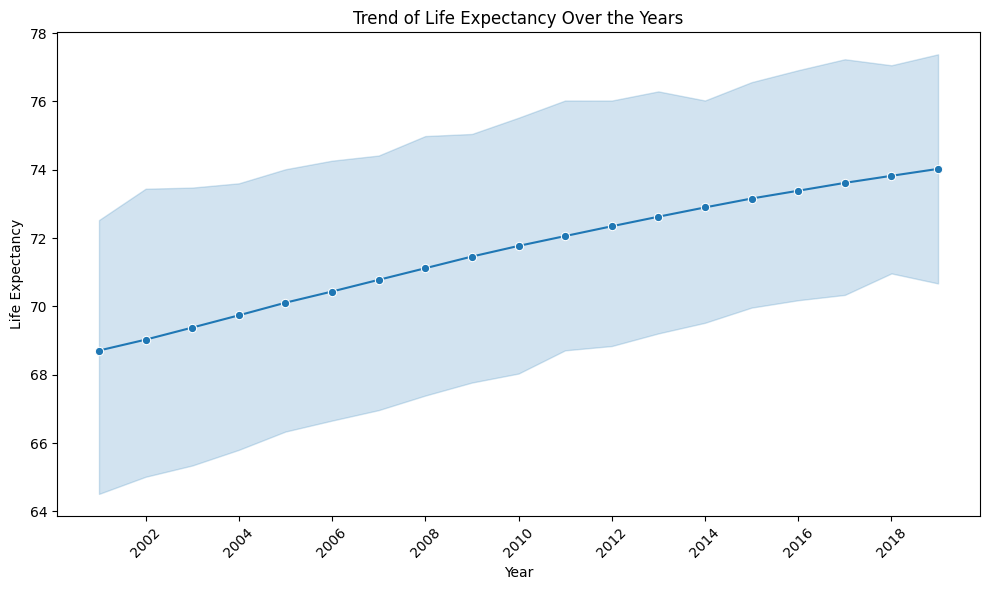

In [29]:

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_socioeconomics, x='Year', y='Life Expectancy World Bank', marker='o')
plt.title('Trend of Life Expectancy Over the Years')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

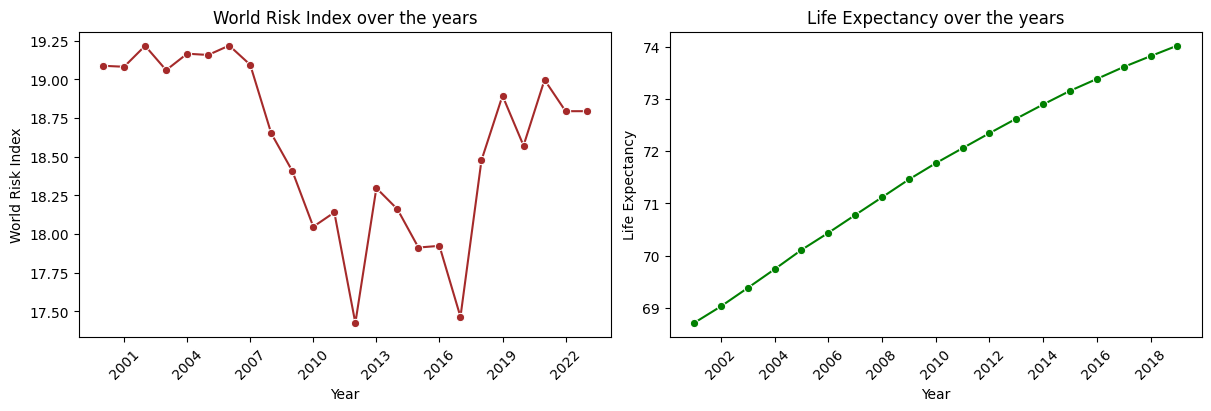

In [24]:
df_wri_trend = df_disaster_risk.groupby('Year')['World Risk Index'].mean().reset_index()
df_trend_le = df_socioeconomics.groupby('Year')['Life Expectancy World Bank'].mean().reset_index()

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), constrained_layout=True)


# Plot the World Risk Index trend
sns.lineplot(data=df_wri_trend, x='Year', y='World Risk Index', marker='o', ax=ax1, color='brown')
ax1.set_title('World Risk Index over the years')
ax1.set_xlabel('Year')
ax1.set_ylabel('World Risk Index')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax1.tick_params(axis='x', rotation=45)

# Plot the Life Expectancy trend
sns.lineplot(data=df_trend_le, x='Year', y='Life Expectancy World Bank', marker='o', ax=ax2, color = 'g')
ax2.set_title('Life Expectancy over the years')
ax2.set_xlabel('Year')
ax2.set_ylabel('Life Expectancy')
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
ax2.tick_params(axis='x', rotation=45)

# Show the plots
plt.show()

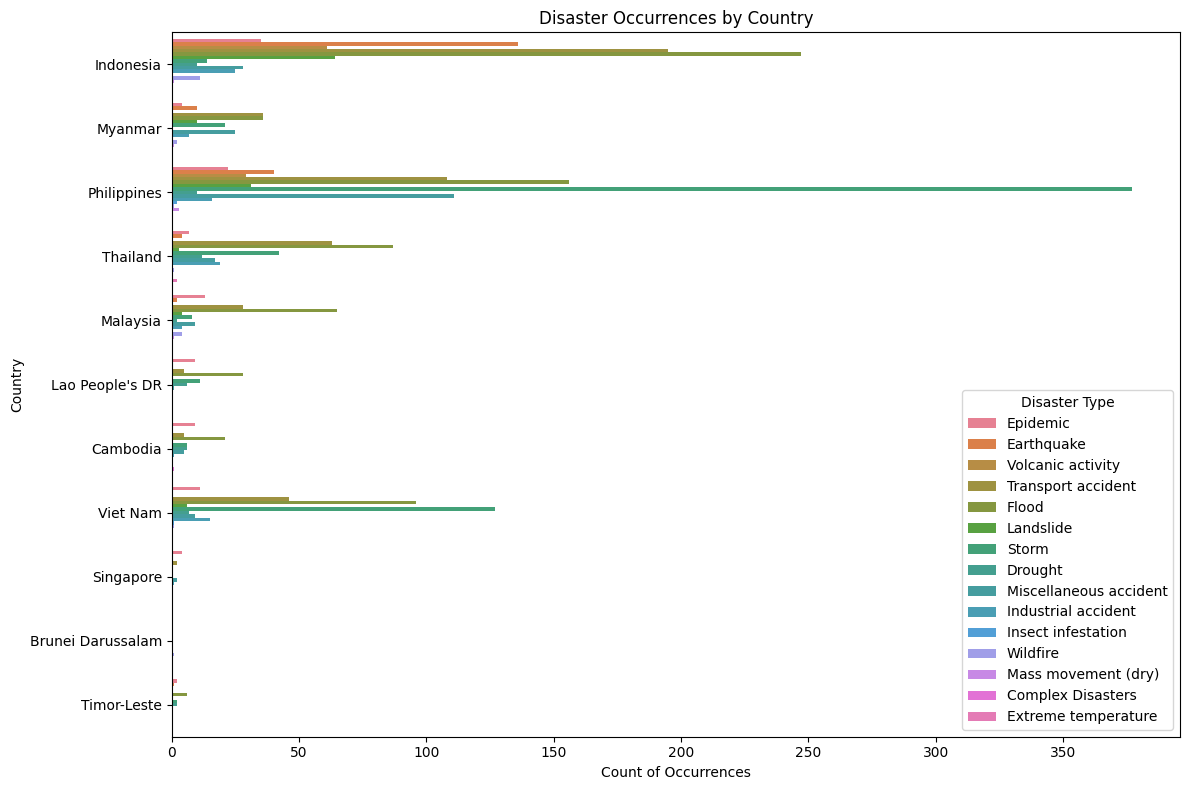

In [31]:
df_counts = df_events.groupby(['Country', 'Disaster Type']).size().reset_index(name='Occurrences')

# Create the stacked bar chart
plt.figure(figsize=(12, 8))
sns.countplot(data=df_events, y='Country', hue='Disaster Type')
plt.title('Disaster Occurrences by Country')
plt.xlabel('Count of Occurrences')
plt.ylabel('Country')
plt.legend(title='Disaster Type')
plt.tight_layout()
plt.show()